In [4]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

In [5]:
url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/all-agents/daily/20150101/20191028"
headers = {"accept":"application/json"}

In [7]:
r = requests.get(url, headers = headers)

Check the status code

In [9]:
r.status_code    # we need to get 20x to bef ok

200

Check out a few attributes

In [12]:
dict(r.headers)

{'Date': 'Tue, 29 Oct 2019 10:13:55 GMT',
 'Content-Type': 'application/json; charset=utf-8',
 'Content-Length': '13418',
 'Connection': 'keep-alive',
 'cache-control': 's-maxage=86400, max-age=86400',
 'x-request-id': 'f9020a00-fa32-11e9-8181-03371958b101',
 'server': 'restbase1018',
 'access-control-allow-origin': '*',
 'access-control-allow-methods': 'GET,HEAD',
 'access-control-allow-headers': 'accept, content-type, content-length, cache-control, accept-language, api-user-agent, if-match, if-modified-since, if-none-match, dnt, accept-encoding',
 'access-control-expose-headers': 'etag',
 'x-content-type-options': 'nosniff',
 'x-frame-options': 'SAMEORIGIN',
 'referrer-policy': 'origin-when-cross-origin',
 'x-xss-protection': '1; mode=block',
 'content-security-policy': "default-src 'none'; frame-ancestors 'none'",
 'x-content-security-policy': "default-src 'none'; frame-ancestors 'none'",
 'x-webkit-csp': "default-src 'none'; frame-ancestors 'none'",
 'Content-Encoding': 'gzip',
 'V

In [11]:
r.text

'{"items":[{"project":"en.wikipedia","access":"desktop","agent":"all-agents","granularity":"daily","timestamp":"2015070100","views":161504749},{"project":"en.wikipedia","access":"desktop","agent":"all-agents","granularity":"daily","timestamp":"2015070200","views":167766090},{"project":"en.wikipedia","access":"desktop","agent":"all-agents","granularity":"daily","timestamp":"2015070300","views":148435361},{"project":"en.wikipedia","access":"desktop","agent":"all-agents","granularity":"daily","timestamp":"2015070400","views":139733040},{"project":"en.wikipedia","access":"desktop","agent":"all-agents","granularity":"daily","timestamp":"2015070500","views":145273389},{"project":"en.wikipedia","access":"desktop","agent":"all-agents","granularity":"daily","timestamp":"2015070600","views":181275052},{"project":"en.wikipedia","access":"desktop","agent":"all-agents","granularity":"daily","timestamp":"2015070700","views":178074696},{"project":"en.wikipedia","access":"desktop","agent":"all-agents"

In [13]:
type(r.text)

str

In [14]:
# but we don't want a string, so we make json

r.json()

{'items': [{'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070100',
   'views': 161504749},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070200',
   'views': 167766090},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070300',
   'views': 148435361},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070400',
   'views': 139733040},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070500',
   'views': 145273389},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070600',
   'views': 181275052},
  {'project': 'en.wikiped

In [15]:
# what is the type of the json?

type(r.json())

dict

In [16]:
# since it's a python dict, we can access the list of dicts through accessing the value of the key 'items'

r.json()["items"]

[{'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070100',
  'views': 161504749},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070200',
  'views': 167766090},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070300',
  'views': 148435361},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070400',
  'views': 139733040},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070500',
  'views': 145273389},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070600',
  'views': 181275052},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-ag

In [17]:
# creating a dataframe

df = pd.DataFrame(r.json()["items"])
df.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,all-agents,daily,2015070100,161504749
1,en.wikipedia,desktop,all-agents,daily,2015070200,167766090
2,en.wikipedia,desktop,all-agents,daily,2015070300,148435361
3,en.wikipedia,desktop,all-agents,daily,2015070400,139733040
4,en.wikipedia,desktop,all-agents,daily,2015070500,145273389


In [18]:
df.dtypes

project        object
access         object
agent          object
granularity    object
timestamp      object
views           int64
dtype: object

pd.to_datetime didn't work

In [20]:
df["timestamp"].str.len()

0       10
1       10
2       10
3       10
4       10
        ..
1576    10
1577    10
1578    10
1579    10
1580    10
Name: timestamp, Length: 1581, dtype: int64

In [21]:
df["timestamp"].str.len().value_counts()

10    1581
Name: timestamp, dtype: int64

In [24]:
# or

df["timestamp"].str[-2:].value_counts()

00    1581
Name: timestamp, dtype: int64

we need to remove 00 from the timestamp as we are not interested in timezone

In [25]:
pd.to_datetime(df["timestamp"],format="%Y%m%d00")

0      2015-07-01
1      2015-07-02
2      2015-07-03
3      2015-07-04
4      2015-07-05
          ...    
1576   2019-10-24
1577   2019-10-25
1578   2019-10-26
1579   2019-10-27
1580   2019-10-28
Name: timestamp, Length: 1581, dtype: datetime64[ns]

In [26]:
df["timestamp"] = pd.to_datetime(df["timestamp"],format="%Y%m%d00")

In [27]:
df.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,all-agents,daily,2015-07-01,161504749
1,en.wikipedia,desktop,all-agents,daily,2015-07-02,167766090
2,en.wikipedia,desktop,all-agents,daily,2015-07-03,148435361
3,en.wikipedia,desktop,all-agents,daily,2015-07-04,139733040
4,en.wikipedia,desktop,all-agents,daily,2015-07-05,145273389


### Let's get some more data and create a function that gets from wikimedia for each access type

In [32]:
#url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/all-agents/daily/20150101/20191028"
#headers = {"accept":"application/json"}
#r = requests.get(url, headers = headers)
#df = pd.DataFrame(r.json()["items"])

ACCESS_TYPES = ["desktop", "mobile-app", "mobile-web"]

def get_wiki_data(access_type):
        url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/{access_type}/all-agents/daily/20150101/20191028"
        headers = {"accept":"application/json"}
        r = requests.get(url, headers = headers)
        df = pd.DataFrame(r.json()["items"])
        
        # now we change the timestamp
        df["timestamp"] = pd.to_datetime(df["timestamp"],format="%Y%m%d00")
        return df

In [33]:
get_wiki_data(ACCESS_TYPES[2])

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-web,all-agents,daily,2015-07-01,99945401
1,en.wikipedia,mobile-web,all-agents,daily,2015-07-02,99457993
2,en.wikipedia,mobile-web,all-agents,daily,2015-07-03,101562576
3,en.wikipedia,mobile-web,all-agents,daily,2015-07-04,109675800
4,en.wikipedia,mobile-web,all-agents,daily,2015-07-05,116756167
...,...,...,...,...,...,...
1576,en.wikipedia,mobile-web,all-agents,daily,2019-10-24,137407310
1577,en.wikipedia,mobile-web,all-agents,daily,2019-10-25,135463055
1578,en.wikipedia,mobile-web,all-agents,daily,2019-10-26,149885477
1579,en.wikipedia,mobile-web,all-agents,daily,2019-10-27,157456179


In [34]:
get_wiki_data(ACCESS_TYPES[1])

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-app,all-agents,daily,2015-07-01,3092637
1,en.wikipedia,mobile-app,all-agents,daily,2015-07-02,3115967
2,en.wikipedia,mobile-app,all-agents,daily,2015-07-03,3267651
3,en.wikipedia,mobile-app,all-agents,daily,2015-07-04,3679989
4,en.wikipedia,mobile-app,all-agents,daily,2015-07-05,4027569
...,...,...,...,...,...,...
1576,en.wikipedia,mobile-app,all-agents,daily,2019-10-24,4122697
1577,en.wikipedia,mobile-app,all-agents,daily,2019-10-25,4142212
1578,en.wikipedia,mobile-app,all-agents,daily,2019-10-26,4850484
1579,en.wikipedia,mobile-app,all-agents,daily,2019-10-27,5240693


In [35]:
[get_wiki_data(access_type) for access_type in ACCESS_TYPES]

[           project   access       agent granularity  timestamp      views
 0     en.wikipedia  desktop  all-agents       daily 2015-07-01  161504749
 1     en.wikipedia  desktop  all-agents       daily 2015-07-02  167766090
 2     en.wikipedia  desktop  all-agents       daily 2015-07-03  148435361
 3     en.wikipedia  desktop  all-agents       daily 2015-07-04  139733040
 4     en.wikipedia  desktop  all-agents       daily 2015-07-05  145273389
 ...            ...      ...         ...         ...        ...        ...
 1576  en.wikipedia  desktop  all-agents       daily 2019-10-24  163054894
 1577  en.wikipedia  desktop  all-agents       daily 2019-10-25  147137319
 1578  en.wikipedia  desktop  all-agents       daily 2019-10-26  128774330
 1579  en.wikipedia  desktop  all-agents       daily 2019-10-27  130260010
 1580  en.wikipedia  desktop  all-agents       daily 2019-10-28  159858767
 
 [1581 rows x 6 columns],
            project      access       agent granularity  timestamp    vi

### Remove the duplicated indexes and sort by the timestamp and access

In [42]:
# merge 3 dataframes into one and sort by the timestamp and access

df = (pd
      .concat([get_wiki_data(access_type) for access_type in ACCESS_TYPES])
      .sort_values(["timestamp","access"])
      .reset_index(drop = True))
df.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,all-agents,daily,2015-07-01,161504749
1,en.wikipedia,mobile-app,all-agents,daily,2015-07-01,3092637
2,en.wikipedia,mobile-web,all-agents,daily,2015-07-01,99945401
3,en.wikipedia,desktop,all-agents,daily,2015-07-02,167766090
4,en.wikipedia,mobile-app,all-agents,daily,2015-07-02,3115967


In [44]:
df.groupby(by = "timestamp").sum()  # sum function only applies to integers

,views
timestamp,
2015-07-01,264542787
2015-07-02,270340050
2015-07-03,253265588
2015-07-04,253088829
2015-07-05,266057125
...,...
2019-10-24,304584901
2019-10-25,286742586
2019-10-26,283510291


### Graph

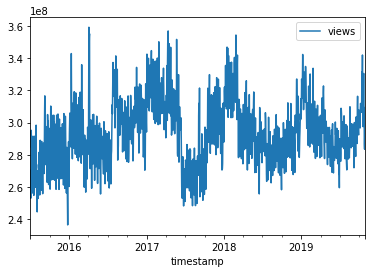

In [47]:
df.groupby(by = "timestamp").sum().plot();     # graph

### Get montly total views

In [55]:
monthly_views = df.groupby(df["timestamp"].dt.to_period("M")).sum()

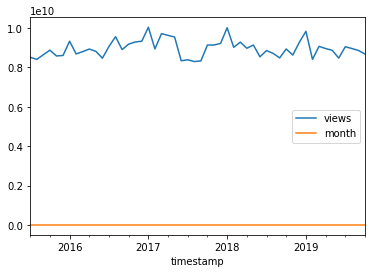

In [58]:
monthly_views.plot(); # wrong one

### Get yearly total views

In [59]:
yearly_views = df.groupby(df["timestamp"].dt.to_period("Y")).sum()

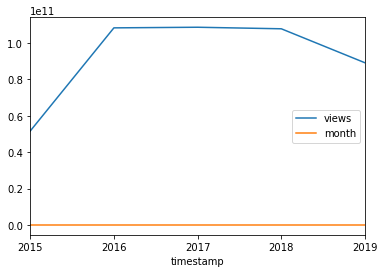

In [60]:
yearly_views.plot();

The monthly one looked interestin because of the weird dip

In [62]:
monthly_views_by_access = df.groupby([df["timestamp"].dt.to_period("M"),"access"]).sum()

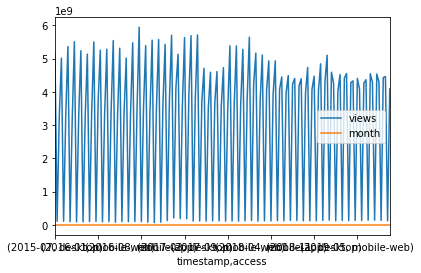

In [63]:
monthly_views_by_access.plot()

Plotting didn't work. We have to create dedicated columns for each access_type

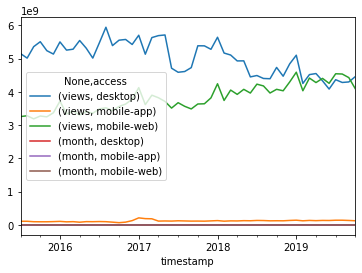

In [64]:
monthly_views_by_access.unstack().plot();